# Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns

# Loading and preparing a dataset

In [5]:
df = pd.read_csv('breast-cancer.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
le = LabelEncoder()

In [11]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [17]:
y = df.iloc[:,1]
x = df.iloc[:,2:]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Training an SVM with linear and RBF kernel

In [20]:
svm_linear = SVC(kernel='linear', C=1.0, gamma='scale')
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

In [22]:
svm_linear.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

SVC()

In [23]:
y_pred_linear = svm_linear.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

In [24]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))
print("Accuracy Score:", accuracy_score(y_test, y_pred_linear))

Confusion Matrix:
 [[70  1]
 [ 4 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.956140350877193


In [25]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rbf))

Confusion Matrix:
 [[71  0]
 [ 6 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score: 0.9473684210526315


# Visualizing decision boundary using 2D data

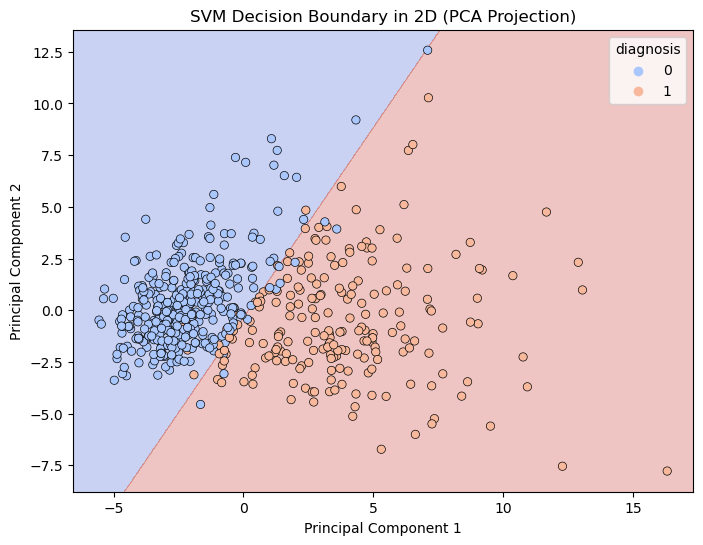

In [34]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
x_2D = pca.fit_transform(x_scaled)

# Train SVM on 2D data
svm_vis = SVC(kernel='linear', C=1.0).fit(x_2D, y)

# Plotting function
def plot_decision_boundary(x, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title("SVM Decision Boundary in 2D (PCA Projection)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Call the plot function
plot_decision_boundary(x_2D, y, svm_vis)


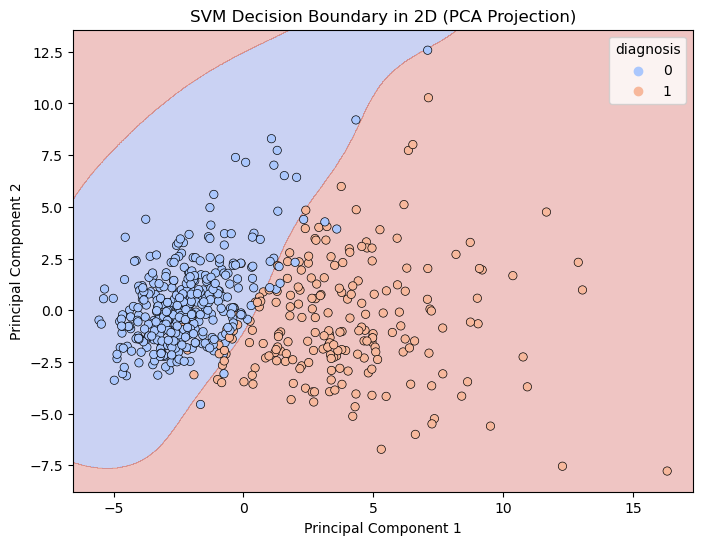

In [33]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
x_2D = pca.fit_transform(x_scaled)

# Train SVM on 2D data
svm_vis = SVC(kernel='rbf', C=1.0).fit(x_2D, y)

# Plotting function
def plot_decision_boundary(x, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title("SVM Decision Boundary in 2D (PCA Projection)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Call the plot function
plot_decision_boundary(x_2D, y, svm_vis)


# Tuning hyperparameters like C and gamma.

In [29]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Grid Search with cross-validation
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


# Using cross-validation to evaluate performance.

In [32]:
cv_scores = cross_val_score(best_model, x_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.93859649 0.92982456 0.94736842 0.95614035 0.96460177]
Average Accuracy: 0.9473063188945815
